# An Investigation into the Relationship between Cholesterol Levels, Age, and Resulting Heart Disease or Lack thereof

Dataset: Heart Disease Dataset | Kaggle - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download


Using classification to predict whether a person who has high cholesterol levels and is older has a higher risk for a heart disease than a person with lower cholesterol levels and is younger.


Heart disease refers to a broad variety of medical problems that can impair the healthy heart's ability to pump blood, which can lead to a heart attack, stroke, or, in the worst circumstances, death. Coronary artery disease, commonly known as atherosclerosis, is the most prevalent kind of heart disease. With this illness, fatty material accumulates over time, blocking the body's arteries and preventing blood flow. If it becomes bad enough, this raises blood pressure, or hypertension, and can lead to heart attacks. A person's chance of getting atherosclerosis or heart disease can be increased by a number of variables, including age, food, and cholesterol levels. Throughout our project, we will be investigating and predicting whether or not a person is likely to develop heart disease based on their cholesterol levels and age by using the classification predictive method. We will use a heart disease dataset that contains several factors including, age, sex, and more, in order to help us answer this question. 


Our predictors are going to be patient age (Age) and their cholesterol levels (in mg/dl) (Cholesterol). We are aiming to predict whether or not a person has heart disease–which is determined by the angiographic disease status–which is labeled as “HeartDisease” in the dataset. We will visualize the results through a scatterplot with our predictors Age against Cholesterol and the points will be color-coded based on the diagnosis of heart disease (HeartDisease). We will start off the cleaning of the dataset by first selecting the variables Age, Cholesterol, and HeartDisease. Then, we will convert HeartDisease to factor. We will then group the data according to the Age and HeartDisease diagnosis and summarize it by finding the mean of Cholesterol levels. At the end, we will arrange our dataset in increasing order of Age. Then we will split the cleaned dataset into training and testing sets. From here, we will conduct a K-nearest neighbor classification to predict whether a person has heart disease or not.


We hope to learn how age and high cholesterol increase a person's likelihood of developing heart disease. Individuals over 65 are more likely than younger people to have cardiovascular disease. As a person ages, changes to their heart and arteries may increase their chance of developing cardiovascular disease. Scientists now have a greater understanding of the elements that influence cardiovascular disease and the aging of our cardiovascular system. Individuals in our community, particularly those of our generation, hardly ever consume fried food on a daily basis. Instead, individuals are adopting healthy routines and including exercising. Members of this age are well conscious of the need to limit these practices and minimize health hazards. Future issues raised by these findings include: Do individuals consider their health enough before engaging in these activities? Might heart issues caused by aging be prevented with existing technology?


Signatures: Dikpaal Patel, Alexandra Kelsick-Plumb, Ayaan Ahuja, Kiana Mercredi

Word Count: 500

Total Word Count: 538

In [7]:
# Loading the required libraries

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [8]:
# Reading and storing the data

heart_data <- read_delim("data/heart.csv")

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
# Cleaning the data


# Raw data

normal_heart_aggregate <- heart_data |>
    select(Age, Cholesterol, HeartDisease) |>
    mutate(HeartDisease = as_factor(HeartDisease)) |>
    arrange(Age)

normal_heart_aggregate

# Cleaned data

heart_aggregate <- heart_data |>
    select(Age, Cholesterol, HeartDisease) |>
    mutate(HeartDisease = as_factor(HeartDisease)) |>
    group_by(Age, HeartDisease) |> 
    summarize(Cholesterol = mean(Cholesterol, na.rm = TRUE)) |>
    arrange(Age)

heart_aggregate

Age,Cholesterol,HeartDisease
<dbl>,<dbl>,<fct>
28,132,0
29,243,0
29,263,0
⋮,⋮,⋮
76,197,0
77,171,1
77,304,1


`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


Age,HeartDisease,Cholesterol
<dbl>,<fct>,<dbl>
28,0,132.0000
29,0,236.6667
30,0,237.0000
⋮,⋮,⋮
76,0,197.0
76,1,113.0
77,1,237.5


In [10]:
# Splitting the dataset into training and testing sets


# Splitting the raw dataset into training and testing sets

normal_heart_split <- initial_split(normal_heart_aggregate, prop = 0.75, strata = HeartDisease)
normal_heart_training <- training(normal_heart_split)   
normal_heart_testing <- testing(normal_heart_split)

# Splitting the cleaned dataset into training and testing sets

heart_split <- initial_split(heart_aggregate, prop = 0.75, strata = HeartDisease)
heart_training <- training(heart_split)   
heart_testing <- testing(heart_split)

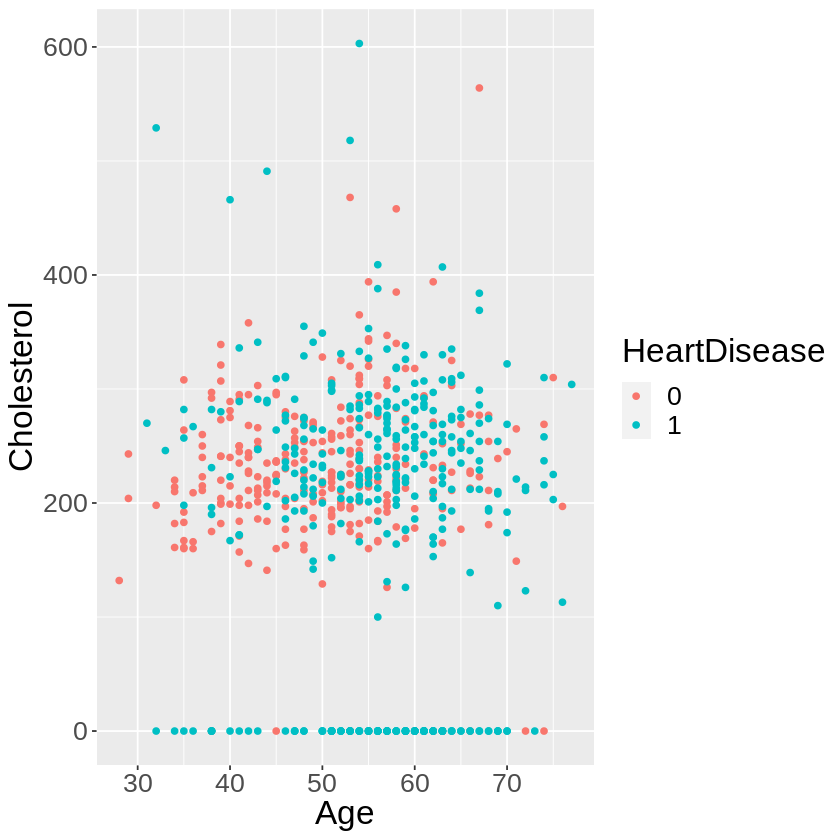

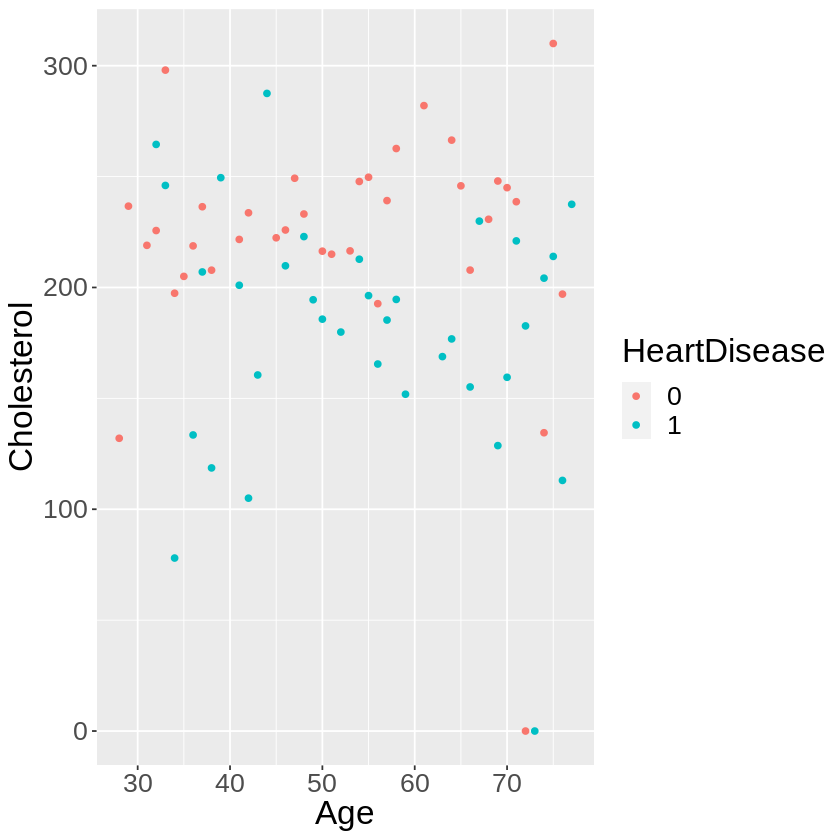

In [11]:
# The plots


# Plotting the normal dataset

normal_heart_plot <- ggplot(normal_heart_training, aes(x = Age, y = Cholesterol, color = HeartDisease)) + 
                geom_point() + 
                xlab("Age") + 
                ylab("Cholesterol") + 
                theme(text = element_text(size = 20))
normal_heart_plot

# Plotting the cleaned dataset

cleaned_heart_plot <- ggplot(heart_training, aes(x = Age, y = Cholesterol, color = HeartDisease)) + 
                geom_point() + 
                xlab("Age") + 
                ylab("Cholesterol") +
                theme(text = element_text(size = 20))

cleaned_heart_plot